<a href="https://www.kaggle.com/code/balupeddireddy/house-price-dataset-exploration?scriptVersionId=126000452" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Import the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Import the training dataset
df_train = pd.read_csv('../input/train.csv')

In [3]:
df_test = pd.read_csv('../input/test.csv')

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#check the columns
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Analysis on Target variable (sales price column)

In [7]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

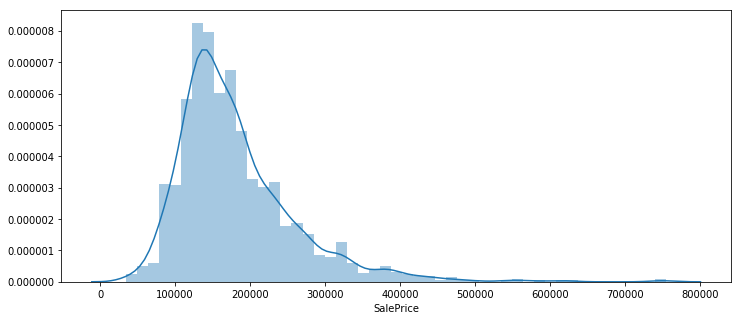

In [8]:
plt.figure(figsize=(12,5))
sns.distplot(df_train['SalePrice'])
plt.show()

In [9]:
print("Skewness of the above distribution", df_train['SalePrice'].skew())
print("Kurtosis of the above distribution", df_train['SalePrice'].kurtosis())

Skewness of the above distribution 1.8828757597682129
Kurtosis of the above distribution 6.536281860064529


In [10]:
from scipy.stats import kurtosis
print("Excess kurtosis of the above distribution", kurtosis(df_train['SalePrice'], fisher=False))

Excess kurtosis of the above distribution 9.509812011089439


Conclusion:
* There are very less number of houses having high price.
* Distribution is right skewed (longer tails on right side).
* It may look like it follows the power distribution (80 - 20 rule).
* It shows peakedness.


### Relation of Target Variable with Numerical Independent Variables

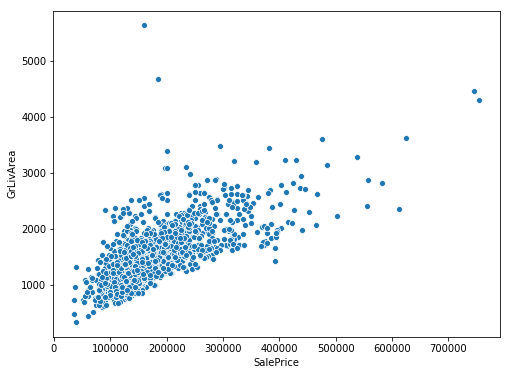

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(df_train['SalePrice'], df_train['GrLivArea'])
plt.show()

Conclusion:
* There is a positive relation between these two variables with some what linear relationship.

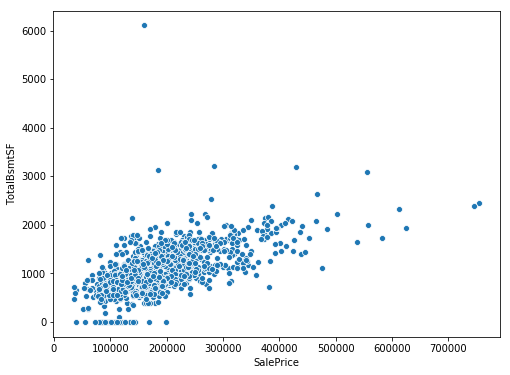

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(df_train['SalePrice'], df_train['TotalBsmtSF'])
plt.show()

Conclusion:
* There is a positive relation between these two variables with exponential relationship.

### Relation of Target Variable with Categorical Variables

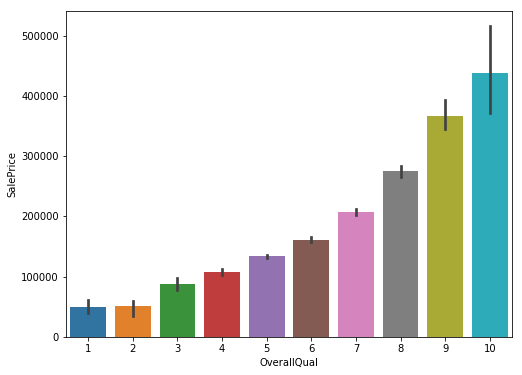

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'OverallQual', y = 'SalePrice', data = df_train)
plt.show()

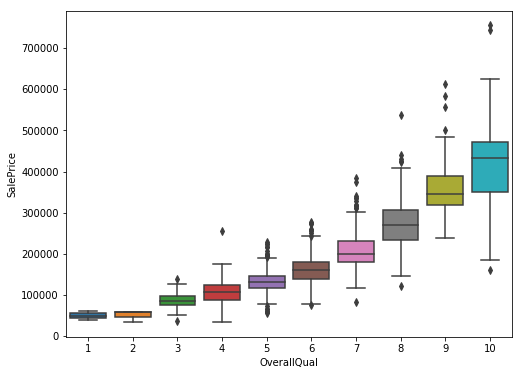

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = df_train)
plt.show()

Conclusion:
* Based on the OverallQuall feature the SalesPrice of the house changes and there directly proportional relation between them.

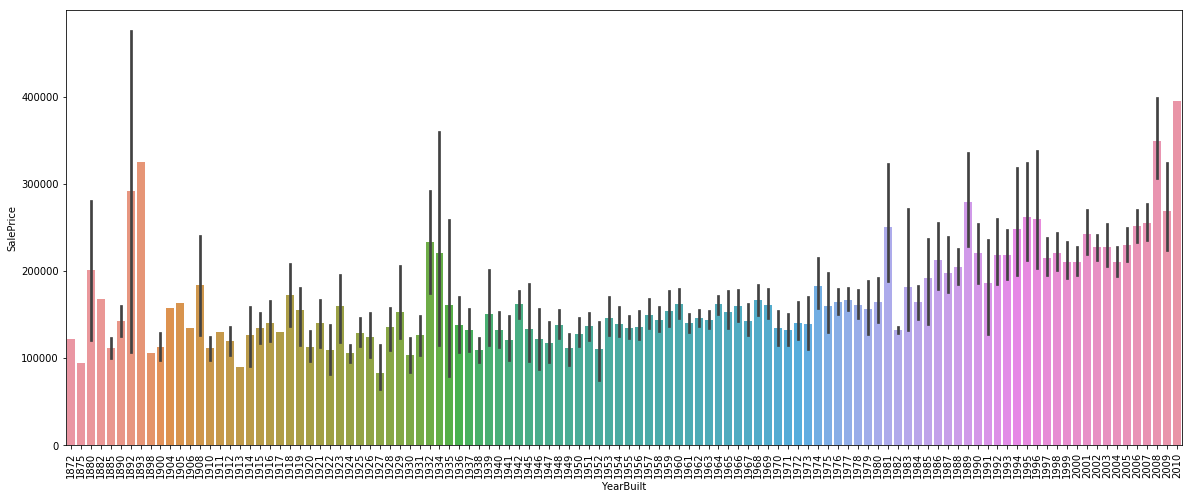

In [15]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'YearBuilt', y = 'SalePrice', data = df_train)
plt.xticks(rotation='vertical')
plt.show()

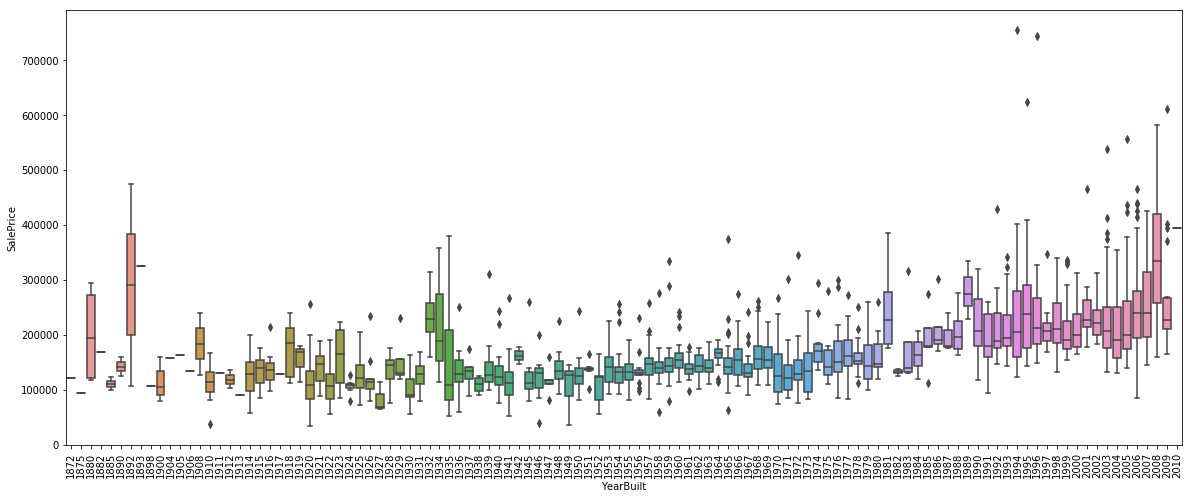

In [16]:
plt.figure(figsize=(20,8))
sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = df_train)
plt.xticks(rotation='vertical')
plt.show()

Conclusion:
* The Houses which are built in recent years has more tendency to be costlier compared to the old ones. 
* There is a partially proportional to each other.

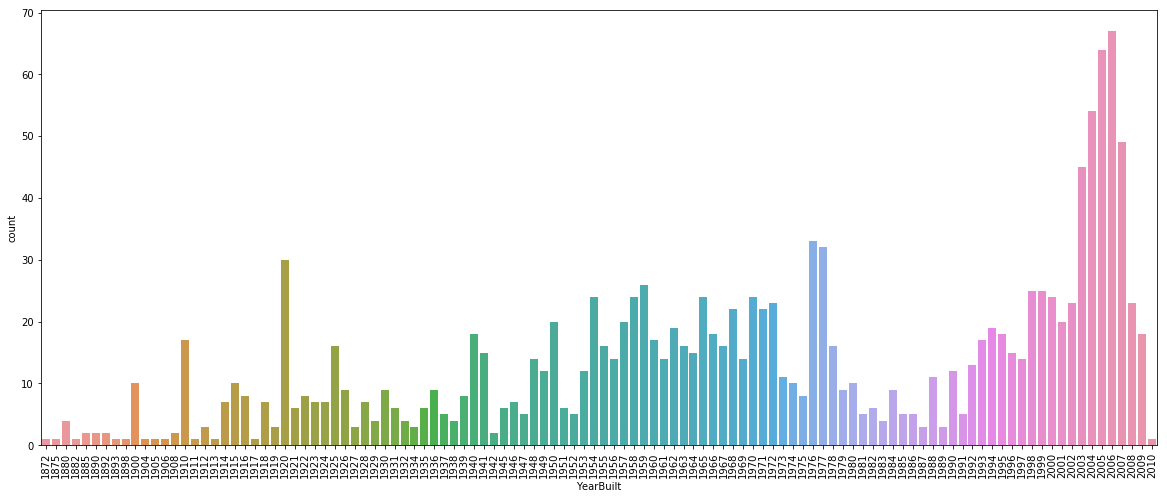

In [17]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'YearBuilt', data = df_train)
plt.xticks(rotation='vertical')
plt.show()

### Multi-Variate Analysis

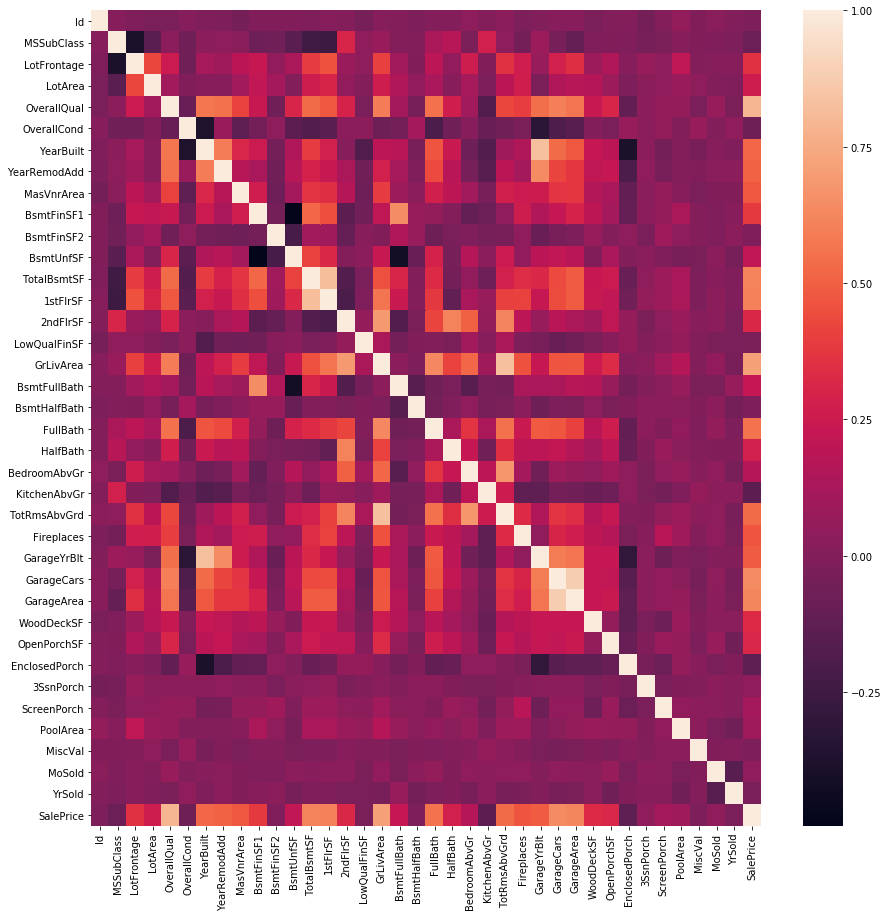

In [18]:
plt.figure(figsize = (15, 15))
sns.heatmap(df_train.corr())
plt.show()


### Heatmap related to Target Variable 

In [19]:
df_train.corr().nlargest(20, 'SalePrice')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


In [20]:
# Top 15 co-related features of the target variable
df_train.corr().nlargest(15, 'SalePrice')['SalePrice']


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

In [21]:
most_co_rel_fet = df_train.corr().nlargest(15, 'SalePrice')['SalePrice'].index
most_co_rel_fet

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

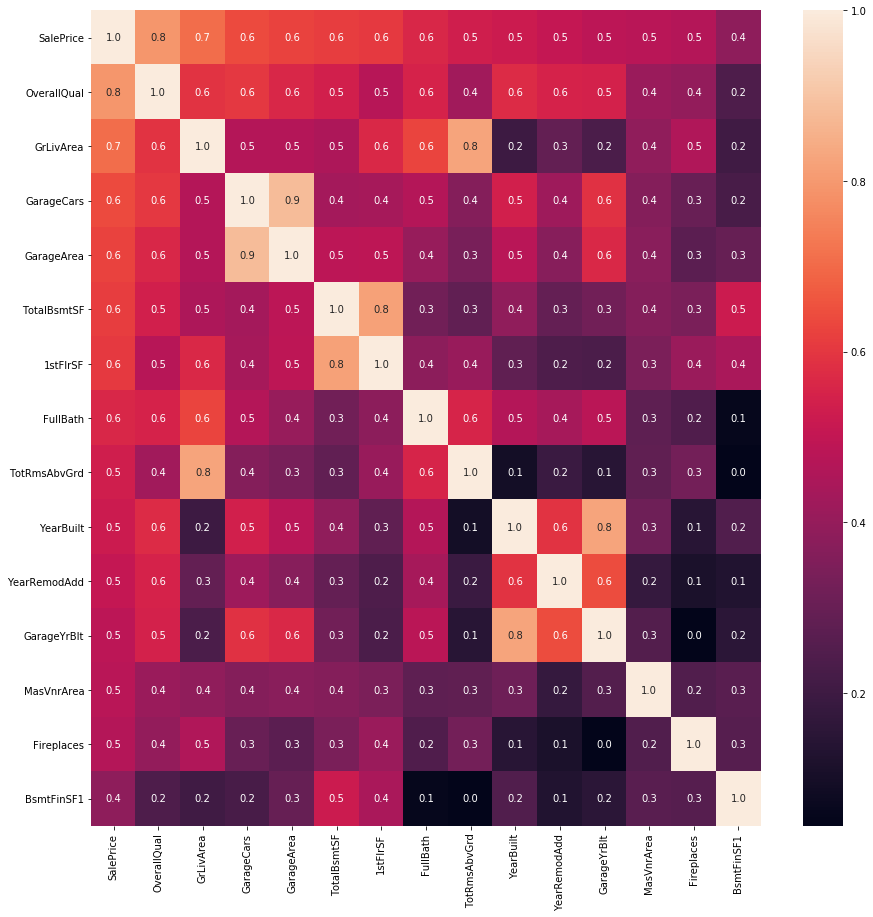

In [22]:
plt.figure(figsize = (15, 15))
sns.heatmap(df_train[most_co_rel_fet].corr(), annot = True, fmt='.1f')
plt.show()


Conclusions:
1. 'OverallQual', 'GrLivArea' are strongly correlated to Target Variable.
2. 'GrLivArea' is strongly correlated to 'TotRmsAbvGrd'.
3. 'GarageCars' and 'GarageArea' are similar features, consider one variable among them.
4. 'TotalBsmtSF' is strongly correlated to '1stFlrSF'.
5. 'FullBath' feature can be selected.
6. 'YearBuilt' is almost same as 'GarageYrBlt'.
7. 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1' features are some what correlated but can be considered since there no similar independent features are present.

In [23]:
Selected_Features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1']


In [24]:
df_train[Selected_Features].head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,MasVnrArea,Fireplaces,BsmtFinSF1
0,7,1710,2,856,2,2003,196.0,0,706
1,6,1262,2,1262,2,1976,0.0,1,978
2,7,1786,2,920,2,2001,162.0,1,486
3,7,1717,3,756,1,1915,0.0,1,216
4,8,2198,3,1145,2,2000,350.0,1,655


In [25]:
# sns.pairplot(df_train[Selected_Features])
# plt.show()

In [26]:
df_train[Selected_Features].dtypes

OverallQual      int64
GrLivArea        int64
GarageCars       int64
TotalBsmtSF      int64
FullBath         int64
YearBuilt        int64
MasVnrArea     float64
Fireplaces       int64
BsmtFinSF1       int64
dtype: object

In [27]:
df_train.isnull().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [28]:
df_train.isnull().sum().sort_values(ascending = False).values/(len(df_train)/100)

array([9.95205479e+01, 9.63013699e+01, 9.37671233e+01, 8.07534247e+01,
       4.72602740e+01, 1.77397260e+01, 5.54794521e+00, 5.54794521e+00,
       5.54794521e+00, 5.54794521e+00, 5.54794521e+00, 2.60273973e+00,
       2.60273973e+00, 2.53424658e+00, 2.53424658e+00, 2.53424658e+00,
       5.47945205e-01, 5.47945205e-01, 6.84931507e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [29]:
null_df_train=pd.DataFrame()
null_df_train['Count']=df_train.isnull().sum().sort_values(ascending = False)
null_df_train['Percentage (%)']=df_train.isnull().sum().sort_values(ascending = False).values/(len(df_train)/100)
null_df_train.head(20)

,Count,Percentage (%)
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


### Simple Handling of missing values
* We can directly delete top five features since they have more than 40 % of missing data.

In [30]:
df_train.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], inplace = True)

In [31]:
null_df_train = null_df_train[null_df_train['Percentage (%)']<40]
null_df_train.head(15)

,Count,Percentage (%)
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtFinType1,37,2.534247
BsmtCond,37,2.534247


* 'LotFrontage' is not an important feature for Target variable, so drop the variable.

In [32]:
df_train.drop(columns = ['LotFrontage'], inplace = True)

In [33]:
null_df_train.drop( ['LotFrontage'], axis=0, inplace = True)

In [34]:
null_df_train.head(15)

,Count,Percentage (%)
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtFinType1,37,2.534247
BsmtCond,37,2.534247
BsmtQual,37,2.534247


In [35]:
df_train['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

* The above Garage(X) varaibles are not important features for the prediction of the target. Therefore we can drop them.

In [36]:
df_train.drop(columns = ['GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual'], inplace = True)

In [37]:
null_df_train = null_df_train[5:][:]

In [38]:
null_df_train.head(10)

,Count,Percentage (%)
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtFinType1,37,2.534247
BsmtCond,37,2.534247
BsmtQual,37,2.534247
MasVnrArea,8,0.547945
MasVnrType,8,0.547945
Electrical,1,0.068493
Utilities,0,0.000000
YearRemodAdd,0,0.000000


* As 'BsmtFinType1' is in seleceted features, impute the feature with corresponding mode value.

In [39]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
df_train[['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']] = imputer.fit_transform(df_train[['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']])

* There are 8 records that contain null values for 'MasVnrArea' and 'MasVnrType' features, so we can drop those records as it does not effect the dataset much. 

In [40]:
df_train1 = df_train[:]
df_train1.dropna(subset = ['MasVnrType', 'MasVnrArea'])['MasVnrType'].isnull().value_counts()

False    1452
Name: MasVnrType, dtype: int64

In [41]:
df_train.dropna(subset = ['MasVnrType', 'MasVnrArea', 'Electrical'], inplace = True)

In [42]:
df_train.isnull().sum().sort_values(ascending = False)

SalePrice        0
ExterQual        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterCond        0
YearBuilt        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
YearRemodAdd     0
OverallCond      0
SaleCondition    0
Utilities        0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
OverallQual      0
LandSlope        0
Neighborhood     0
                ..
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
3SsnPorch        0
TotalBsmtSF      0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea   

### Dettection and Handling of Outliers

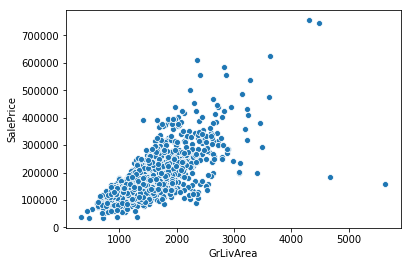

In [43]:
sns.scatterplot(df_train['GrLivArea'], df_train['SalePrice'])
plt.show()

In [44]:
df_train.drop(df_train[(df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 300000)].index, axis = 0, inplace = True)

In [45]:
df_train[(df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 300000)]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


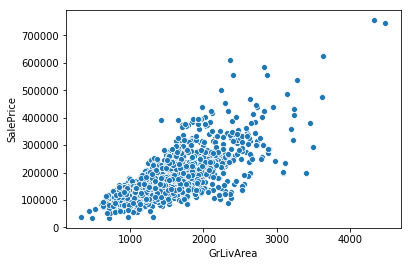

In [46]:
sns.scatterplot(df_train['GrLivArea'], df_train['SalePrice'])
plt.show()

* We performed uni and bi-variate analysis in the beginning.
* In order to go with multi-variate analysis, we need to make sure that the target variable is complying with the statistical assumptions:
    *  <b>Normality</b> - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics).
    * <b>Homoscedasticity</b> - It refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)'. Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.
    * <b>Linearity</b> - The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations.
    * <b>Absence of correlated errors</b> - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables.
    

### Normality Check
* Histogram - Kurtosis and skewness.
* Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

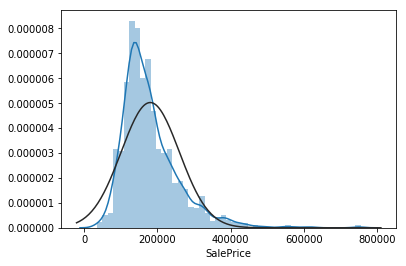

In [47]:
from scipy.stats import norm
sns.distplot(df_train['SalePrice'], fit = norm )
plt.show()

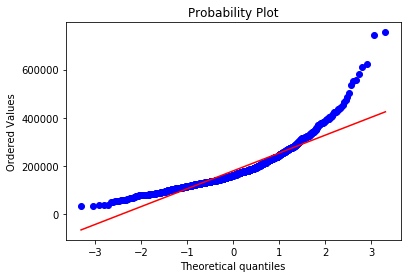

In [48]:
from scipy import stats
stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

Conclusion:
* The above distribution is positvely skewed and we can apply log transform to convert into normal distribution.


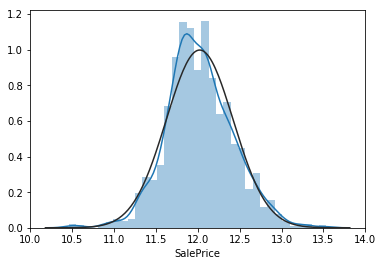

In [49]:
target_var = np.log(df_train['SalePrice'])
sns.distplot(target_var, fit = norm)
plt.show()

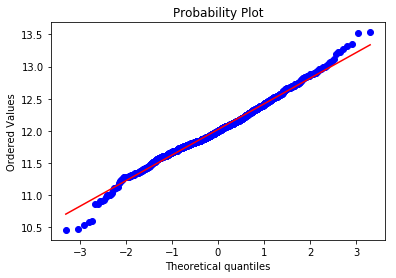

In [50]:
stats.probplot(target_var, plot=plt)
plt.show()

* We can apply this to different variables as well.
* <b>When we handle the normility, then there is less need to check for homoscedasticity as well. </b>
* At last we can convert the categorical variables into dummy variables using get_dummies method.

### Feature Engineering

Let's concatenate the train and test dataset in the same dataframe.
* Missing value handling is done in the above code.

#### Transforming some numerical variables that are actually categorical

In [51]:
Selected_Features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1']

In [52]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [53]:
X_train = pd.DataFrame(df_train[Selected_Features])
y_train = df_train['SalePrice']
print("Training dataset", len(X_train))
X_test = df_test[Selected_Features]
# y_test = df_test['SalePrice']
print("Testing dataset", len(X_test))

Training dataset 1449
Testing dataset 1459


In [54]:
X_df = pd.concat([X_train, X_test], axis=0, ignore_index=True)
X_df


,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,MasVnrArea,Fireplaces,BsmtFinSF1
0,7,1710,2.0,856.0,2,2003,196.0,0,706.0
1,6,1262,2.0,1262.0,2,1976,0.0,1,978.0
2,7,1786,2.0,920.0,2,2001,162.0,1,486.0
3,7,1717,3.0,756.0,1,1915,0.0,1,216.0
4,8,2198,3.0,1145.0,2,2000,350.0,1,655.0
5,5,1362,2.0,796.0,1,1993,0.0,0,732.0
6,8,1694,2.0,1686.0,2,2004,186.0,1,1369.0
7,7,2090,2.0,1107.0,2,1973,240.0,2,859.0
8,7,1774,2.0,952.0,2,1931,0.0,2,0.0
9,5,1077,1.0,991.0,1,1939,0.0,2,851.0


In [55]:
for i in Selected_Features:
    print(i)
    print(len(X_df[i].value_counts()))

OverallQual
10
GrLivArea
1287
GarageCars
6
TotalBsmtSF
1052
FullBath
5
YearBuilt
118
MasVnrArea
442
Fireplaces
5
BsmtFinSF1
988


In [56]:
X_df['OverallQual'] = X_df['OverallQual'].astype(str)
X_df['GarageCars'] = X_df['GarageCars'].astype(str)
X_df['FullBath'] = X_df['FullBath'].astype(str)
X_df['YearBuilt'] = X_df['YearBuilt'].astype(str)
X_df['Fireplaces'] = X_df['Fireplaces'].astype(str)

In [57]:
X_df['YearBuilt'].value_counts()

2005    142
2006    135
2007    106
2004     99
2003     87
1920     57
1977     57
1976     54
1999     52
1958     48
2008     48
2000     48
1998     46
1968     45
2002     45
1910     43
1959     43
1954     43
1970     42
1967     41
1972     40
1978     39
1971     39
1993     39
1956     39
1950     38
1994     37
1960     37
1940     36
2001     35
       ... 
1985      7
1890      7
1982      7
1942      6
1919      5
1932      5
1934      5
1880      5
1912      5
1895      3
1917      3
1905      3
2010      3
1885      2
1892      2
1901      2
1908      2
1882      1
1906      1
1898      1
1902      1
1911      1
1896      1
1879      1
1913      1
1907      1
1904      1
1872      1
1893      1
1875      1
Name: YearBuilt, Length: 118, dtype: int64

#### Label Encoding
* Categorical variables contain information that follows order, so we can apply label encoding

In [58]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
Selected_Categorical_Features = ['OverallQual', 'GarageCars', 'FullBath', 'Fireplaces']
for i in Selected_Categorical_Features:
    X_df[i] = lbe.fit_transform(X_df[i])
X_df

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,MasVnrArea,Fireplaces,BsmtFinSF1
0,7,1710,2,856.0,2,2003,196.0,0,706.0
1,6,1262,2,1262.0,2,1976,0.0,1,978.0
2,7,1786,2,920.0,2,2001,162.0,1,486.0
3,7,1717,3,756.0,1,1915,0.0,1,216.0
4,8,2198,3,1145.0,2,2000,350.0,1,655.0
5,5,1362,2,796.0,1,1993,0.0,0,732.0
6,8,1694,2,1686.0,2,2004,186.0,1,1369.0
7,7,2090,2,1107.0,2,1973,240.0,2,859.0
8,7,1774,2,952.0,2,1931,0.0,2,0.0
9,5,1077,1,991.0,1,1939,0.0,2,851.0


In [59]:
Selected_Numerical_Features = []
for i in Selected_Features:
    if i not in Selected_Categorical_Features:
        Selected_Numerical_Features.append(i)
Selected_Numerical_Features
Selected_Numerical_Features.remove('YearBuilt')

In [60]:
for i in Selected_Numerical_Features:
    print(i, ':', X_df[i].skew())

GrLivArea : 1.0723925329718176
TotalBsmtSF : 0.677021326688095
MasVnrArea : 2.6101733882639326
BsmtFinSF1 : 0.9854683570249462


* If the numerical features are too skewed, we can apply box-cox transformation.

### Get dummies for categorical features
* Create dummy variables for the catrgorical variables.

In [61]:
X_df = pd.get_dummies(X_df, drop_first = True)
X_df.shape

(2908, 125)

* Split the dataset into train and test datasets.

In [62]:
X_train = X_df[:1449]
X_test = X_df[1449:]
print('Length of X_train :', len(X_train), '\nLength of X_test  :', len(X_test))

Length of X_train : 1449 
Length of X_test  : 1459


# Modelling

In [63]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

### Define a cross validation strategy

In [64]:
def param_cv(model, param = 'neg_mean_squared_error', n_fold = 5):
    kf = KFold(n_fold, shuffle = True, random_state = 42).get_n_splits(X_train.values)
    result = (cross_val_score(model, X_train.values, y_train, scoring = param, cv = kf))
    return(result)

### LASSO Regression :
* This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline.
* Lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

In [65]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

### Elastic Net Regression :
* Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.
* The benefit is that elastic net allows a balance of both penalties, which can result in better performance than a model with either one or the other penalty on some problems. 
* Another hyperparameter is provided called “lambda” that controls the weighting of the sum of both penalties to the loss function.

ChatGPT

* Elastic Net Regression is a regularized linear regression technique that combines both L1 and L2 regularization penalties to address some of the limitations of these two regularization techniques.

* L1 regularization, also known as Lasso regularization, shrinks some of the coefficients to zero and eliminates them from the model, thus performing feature selection. However, it may lead to instability in the presence of highly correlated features.

* L2 regularization, also known as Ridge regularization, reduces the magnitude of the coefficients but does not perform feature selection, keeping all the features in the model.

* Elastic Net regression combines both L1 and L2 regularization penalties to balance their strengths and overcome their weaknesses. The model minimizes a loss function consisting of both penalties, with two hyperparameters, alpha and lambda, controlling the relative strength of the penalties.

* Elastic Net Regression is particularly useful when dealing with datasets that have high dimensionality (a large number of features), multicollinearity (high correlation between features), and noisy data. It has been widely used in various fields, such as finance, genetics, and image processing.

In [66]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))


### Kernel Ridge Regression :
* Kernel ridge regression is essentially the same as usual ridge regression, but uses the kernel trick to go non-linear.
* Kernel ridge regression (KRR) combines Ridge regression and classification (linear least squares with l2-norm regularization) with the kernel trick.

ChatGPT
* Kernel Ridge Regression (KRR) is a nonlinear regression method that combines Ridge Regression with the kernel trick to address nonlinearities in the data. It is a popular method in machine learning and statistical learning for solving regression problems.

* The basic idea of kernel ridge regression is to map the input data into a high-dimensional feature space using a nonlinear function called a kernel function. The method then applies Ridge Regression to the transformed data in the feature space to learn a linear regression model.

* The regularization parameter in the Ridge Regression is used to control the complexity of the model and prevent overfitting. Similarly, in KRR, the regularization parameter controls the smoothness of the learned function in the feature space.

* The kernel function is a critical component of KRR, and there are many types of kernel functions, such as the linear kernel, polynomial kernel, radial basis function (RBF) kernel, and sigmoid kernel. The choice of kernel function depends on the specific problem and the characteristics of the data.

* KRR is a powerful and flexible regression method that can handle complex nonlinear relationships between the input variables and the target variable. It has been applied successfully in various fields, such as finance, bioinformatics, and image processing.

In [67]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

### Gradient Boosting Regression :
* Gradient boosting Regression calculates the difference between the current prediction and the known correct target value. This difference is called residual. 
* After that Gradient boosting Regression trains a weak model that maps features to that residual.
* With huber loss that makes it robust to outliers.

ChatGPT

The basic idea of gradient boosting regression is to iteratively add weak decision trees to the model, with each subsequent tree correcting the errors of the previous one. The model starts with a single decision tree, and additional trees are added sequentially, with each tree being trained to predict the residual errors of the previous trees.

The trees are constructed using a greedy algorithm that selects the split point that minimizes the mean squared error (MSE) of the predictions. The gradient descent algorithm is used to optimize the model parameters, such as the learning rate and the number of trees, to minimize the loss function.

Gradient Boosting Regression is a powerful technique that can handle complex nonlinear relationships between the input variables and the target variable. It is particularly effective in situations where there are many interacting variables or where the relationship between the variables is not linear.

Gradient Boosting Regression has been successfully applied in various fields, such as finance, marketing, and bioinformatics. However, it can be computationally intensive and may require careful tuning of the model parameters to avoid overfitting.

In [68]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

### XGBRegressor:

ChatGPT

* XGBRegressor is a class in the XGBoost library, which is an implementation of gradient boosting regression. XGBoost is a powerful and popular machine learning library that is known for its high performance and scalability.

* The XGBRegressor class is used for regression tasks and is similar to the GradientBoosting Regressor class in scikit-learn. However, XGBoost offers several advantages over the scikit-learn implementation, such as better handling of missing data, built-in support for parallel processing, and the ability to handle large datasets efficiently.

* The XGBRegressor class supports a wide range of hyperparameters that can be tuned to optimize the performance of the model. Some of the important hyperparameters include the learning rate, the number of trees (or estimators), the maximum depth of the trees, and the regularization parameters.

* One of the unique features of XGBoost is its ability to handle both linear and nonlinear relationships between the input variables and the target variable. It achieves this by using a combination of linear models and decision trees in its ensemble.

* XGBRegressor has been used successfully in various applications, such as finance, marketing, and image processing.

In [69]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

### LightGBM:
* LightGBM, short for light gradient-boosting machine, is a free and open-source distributed gradient-boosting framework for machine learning, originally developed by Microsoft. 
* It is based on decision tree algorithms and used for ranking, classification and other machine learning tasks.

ChatGPT

* LightGBM (Light Gradient Boosting Machine) is an open-source machine learning library that is designed to perform gradient boosting on large-scale datasets. It is similar to XGBoost and CatBoost, but it is known for its speed and efficiency.

* The main feature of LightGBM is its ability to handle large datasets with millions of rows and thousands of columns. It achieves this by using a technique called Gradient-based One-Side Sampling (GOSS) to select a small subset of the data for each tree. GOSS focuses on the samples that contribute the most to the gradient, thereby reducing the computation time and memory usage.

* Another important feature of LightGBM is its ability to handle categorical features. It uses an algorithm called Gradient-based Decision Making (GBDT) to split the categorical features and create new splits. This approach can significantly improve the performance of the model on datasets with categorical features.

* LightGBM also supports various advanced features, such as GPU acceleration, histogram-based feature bundling, and custom loss functions. These features make it a powerful and flexible tool for machine learning tasks.

In [70]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

### Base models scores

In [71]:
score = param_cv(lasso, param = 'r2')
print(score)
print("Score - Mean : {:.4f}, STD : {:.4f}".format(score.mean(), score.std()))

[0.75863123 0.83701996 0.81682664 0.80351721 0.77548789]
Score - Mean : 0.7983, STD : 0.0282


In [72]:
score = param_cv(ENet, param = 'r2')
print(score)
print("Score - Mean : {:.4f}, STD : {:.4f}".format(score.mean(), score.std()))

[0.76133785 0.84537721 0.8225007  0.80623879 0.78218319]
Score - Mean : 0.8035, STD : 0.0295


In [73]:
score = param_cv(KRR, param = 'r2')
print(score)
print("Score - Mean : {:.4f}, STD : {:.4f}".format(score.mean(), score.std()))

[0.70408609 0.81405109 0.83576924 0.82321809 0.79001014]
Score - Mean : 0.7934, STD : 0.0471


In [74]:
score = param_cv(GBoost, param = 'r2')
print(score)
print("Score - Mean : {:.4f}, STD : {:.4f}".format(score.mean(), score.std()))

[0.82233498 0.90136588 0.87668571 0.86010957 0.84531721]
Score - Mean : 0.8612, STD : 0.0269


In [75]:
score = param_cv(model_xgb, param = 'r2')
print(score)
print("Score - Mean : {:.4f}, STD : {:.4f}".format(score.mean(), score.std()))

[0.82500779 0.88077125 0.88264256 0.88180374 0.88033824]
Score - Mean : 0.8701, STD : 0.0226


In [76]:
score = param_cv(model_lgb, param = 'r2')
print(score)
print("Score - Mean : {:.4f}, STD : {:.4f}".format(score.mean(), score.std()))

[0.82290638 0.89099091 0.88305993 0.88112728 0.87123218]
Score - Mean : 0.8699, STD : 0.0243


### Stacking models
We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse (inheritance)

In [77]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [78]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

param_cv(averaged_models, param = 'r2')

array([0.79949394, 0.88628413, 0.87310001, 0.85358964, 0.83478972])

### Less simple Stacking : Adding a Meta-model
In this approach, we add a meta-model on averaged base models and use the out-of-folds predictions of these base models to train our meta-model.

The procedure, for the training part, may be described as follows:

* Split the total training set into two disjoint sets (here train and .holdout )

* Train several base models on the first part (train)

* Test these base models on the second part (holdout)

Use the predictions from 3) (called out-of-folds predictions) as the inputs, and the correct responses (target variable) as the outputs to train a higher level learner called meta-model.

The first three steps are done iteratively . If we take for example a 5-fold stacking , we first split the training data into 5 folds. Then we will do 5 iterations. In each iteration, we train every base model on 4 folds and predict on the remaining fold (holdout fold).

So, we will be sure, after 5 iterations , that the entire data is used to get out-of-folds predictions that we will then use as new feature to train our meta-model in the step 4.

For the prediction part , We average the predictions of all base models on the test data and used them as meta-features on which, the final prediction is done with the meta-model.

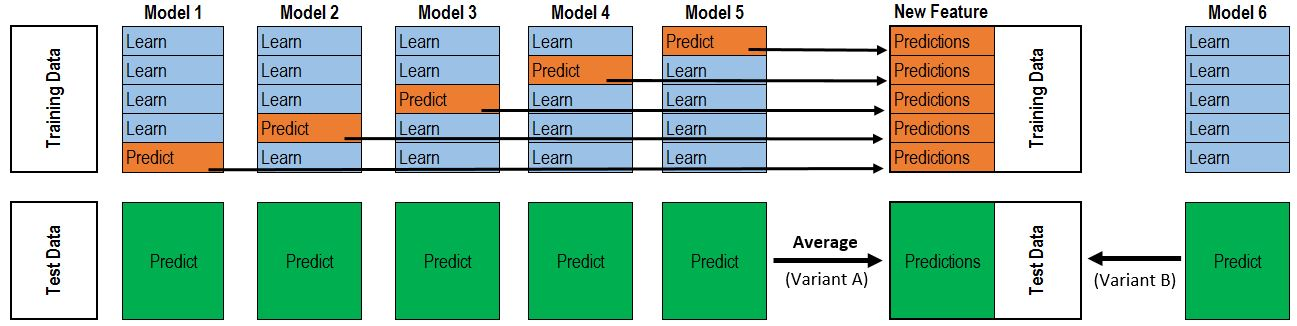



In [79]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                print(len(train_index), len(holdout_index))
                print(y.max())
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [80]:
# stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
#                                                  meta_model = lasso)
# stacked_averaged_models.fit(X_train.values, y_train)
# stacked_train_pred = stacked_averaged_models.predict(train.values)
# stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
# print((y_train, stacked_train_pred))